### Import Libraries

In [2]:
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import os
import time
import json

### Extracting the dataset

In [3]:
# Extracting data from csv file
item_df = pd.read_csv(r'Raw_datasets/item.csv')

item_df

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ
...,...,...,...,...,...
922,3905955112,SPRNG TREE SF MAPLE SYRUP,Type 4,Spring Tree,P 24 OZ
923,3905972884,SPRING TREE MAPLE SYRUP,Type 4,Spring Tree,8.5 OZ
924,3068434050,TREE OF LIFE REGULAR BLACKSTRA,Type 4,Tree of Life,##########
925,3068434052,TREE OF LIFE REGULAR BLACKSTRA,Type 4,Tree of Life,##########


In [4]:
# Checking and dropping duplicate rows
item_df = item_df.drop_duplicates()

item_df

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ
...,...,...,...,...,...
922,3905955112,SPRNG TREE SF MAPLE SYRUP,Type 4,Spring Tree,P 24 OZ
923,3905972884,SPRING TREE MAPLE SYRUP,Type 4,Spring Tree,8.5 OZ
924,3068434050,TREE OF LIFE REGULAR BLACKSTRA,Type 4,Tree of Life,##########
925,3068434052,TREE OF LIFE REGULAR BLACKSTRA,Type 4,Tree of Life,##########


In [5]:
# Extracting data from csv file
promotion_df = pd.read_csv(r'Raw_datasets\promotion.csv')

promotion_df

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [6]:
# Checking and dropping duplicate rows
promotion_df = promotion_df.drop_duplicates()

promotion_df

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [7]:
# Extracting data from csv file
sales_df = pd.read_csv(r'Raw_datasets/sales.csv')

sales_df

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1510000011,2.35,1,1307,2,27,43825,346,665448,189,0
1048571,3620000489,0.99,1,1307,2,27,43825,346,665448,189,0
1048572,9999971309,2.00,2,1410,2,27,42140,346,665449,189,0
1048573,3620000250,1.98,2,1415,2,27,53544,346,665450,189,0


In [8]:
# Checking and dropping duplicate rows
sales_df = sales_df.drop_duplicates()

sales_df

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1510000011,2.35,1,1307,2,27,43825,346,665448,189,0
1048571,3620000489,0.99,1,1307,2,27,43825,346,665448,189,0
1048572,9999971309,2.00,2,1410,2,27,42140,346,665449,189,0
1048573,3620000250,1.98,2,1415,2,27,53544,346,665450,189,0


In [9]:
# Extracting data from csv file
supermarkets_df = pd.read_csv(r'Raw_datasets\supermarkets.csv')

supermarkets_df

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542
...,...,...
382,383,40502
383,384,42367
384,385,37160
385,386,29803


In [10]:
# Checking and dropping duplicate rows
supermarkets_df = supermarkets_df.drop_duplicates()

supermarkets_df

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542
...,...,...
382,383,40502
383,384,42367
384,385,37160
385,386,29803


### Checking for missing values

In [11]:
item_df.info()

# No missing data in item_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        927 non-null    int64 
 1   descrption  927 non-null    object
 2   type        927 non-null    object
 3   brand       927 non-null    object
 4   size        927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [12]:
promotion_df.info()

# No missing data in promotion_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   code          351372 non-null  int64 
 1   supermarkets  351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature       351372 non-null  object
 4   display       351372 non-null  object
 5   province      351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [13]:
sales_df.info()

# No missing values in sales_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB


In [14]:
supermarkets_df.info()

# No missing values in supermarkets_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   supermarket_No  387 non-null    int64
 1   postal-code     387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


### Checking for duplicates in key columns

In [15]:
# Checking for duplicates in the item_df 
# Check for duplicates in 'code' column
item_duplicates = item_df[item_df['code'].duplicated()]
print(item_duplicates)

Empty DataFrame
Columns: [code, descrption, type, brand, size]
Index: []


In [16]:
# Count occurrences of each value
item_value_counts = item_df['code'].value_counts()

# Filter values that appear more than once
item_duplicates_no = item_value_counts[item_value_counts > 1]
print(item_duplicates_no)

# No duplicate data in the code column of item_df

Series([], Name: count, dtype: int64)


In [17]:
# Checking for duplicates in the promotion_df 
# Check for duplicates in 'code' column
promotion_duplicates = promotion_df[promotion_df['code'].duplicated()]
print(promotion_duplicates)

              code  supermarkets  week                  feature  \
5       2700042240           285    92    Interior Page Feature   
9       2700042240           285    93           Not on Feature   
46      3620001375             1    56  Interior Page Line Item   
49      3620001369             1    56  Interior Page Line Item   
52      3620001365             1    56  Interior Page Line Item   
...            ...           ...   ...                      ...   
351367  9999966721           387   101       Wrap Front Feature   
351368  9999966720           387   101       Wrap Front Feature   
351369  3620000507           387   104    Interior Page Feature   
351370  3620000493           387   104    Interior Page Feature   
351371  9999966715           387   101       Wrap Front Feature   

                  display  province  
5       Mid-Aisle End Cap         2  
9       Mid-Aisle End Cap         2  
46         Not on Display         1  
49         Not on Display         1  
52   

In [18]:
# Count occurrences of each value
promotion_value_counts = promotion_df['code'].value_counts()

# Filter values that appear more than once
promotion_duplicates_no = promotion_value_counts[promotion_value_counts > 1]
print(promotion_duplicates_no)

# There are a lot of duplicate data in the code column of promotion_df

code
3620000300    6615
3620000250    5842
3620000350    5399
9999985052    3654
3620000440    3379
              ... 
3340006508       2
2472200005       2
7130000081       2
4119606063       2
9999968192       2
Name: count, Length: 446, dtype: int64


In [19]:
# Checking for duplicates in the sales_df 
# Check for duplicates in 'code' column
sales_duplicates = sales_df[sales_df['code'].duplicated()]
print(sales_duplicates)

               code  amount  units  time  province  week  customerId  \
17       3620000446    2.19      1  1754         2     1      108013   
20       9999985067    0.85      1  1815         2     1       53674   
29       9999985048    0.75      1  2050         2     1       83172   
37       2700042239    0.99      1  1102         2     1      118654   
42       2700042239    0.99      1  1627         2     1      122564   
...             ...     ...    ...   ...       ...   ...         ...   
1048570  1510000011    2.35      1  1307         2    27       43825   
1048571  3620000489    0.99      1  1307         2    27       43825   
1048572  9999971309    2.00      2  1410         2    27       42140   
1048573  3620000250    1.98      2  1415         2    27       53544   
1048574  3620000350    1.98      2  1415         2    27       53544   

         supermarket  basket  day  voucher  
17               244      11    1        0  
20               244      12    1        0  


In [20]:
# Count occurrences of each value
sales_value_counts = sales_df['code'].value_counts()

# Filter values that appear more than once
sales_duplicates_no = sales_value_counts[sales_value_counts > 1]
print(sales_duplicates_no)

# There are a lot of duplicate data in the code column of sales_df

code
9999985020    18009
9999985004    17703
3620000250    17238
9999985068    14756
9999985021    11118
              ...  
8532801991        2
7140303303        2
8939710379        2
3620000661        2
7914730119        2
Name: count, Length: 737, dtype: int64


In [21]:
# Check for duplicates in 'code' column
sales_duplicates_customerId = sales_df[sales_df['customerId'].duplicated()]
print(sales_duplicates_customerId)

               code  amount  units  time  province  week  customerId  \
1        3620000470    3.59      1  1100         2     1      125434   
5        5100002794    2.19      1  1323         2     1       89437   
7        9999985051    1.29      1  1415         2     1      158549   
11       3340060177    1.50      1  1624         2     1        8283   
12       4112907712    3.65      1  1624         2     1        8283   
...             ...     ...    ...   ...       ...   ...         ...   
1048569  3620000300    1.98      2  1107         2    27       41469   
1048570  1510000011    2.35      1  1307         2    27       43825   
1048571  3620000489    0.99      1  1307         2    27       43825   
1048572  9999971309    2.00      2  1410         2    27       42140   
1048574  3620000350    1.98      2  1415         2    27       53544   

         supermarket  basket  day  voucher  
1                244       1    1        0  
5                244       4    1        0  


In [22]:
# Count occurrences of each value
sales_value_counts_customerId = sales_df['customerId'].value_counts()

# Filter values that appear more than once
sales_duplicates_no_customerId = sales_value_counts_customerId[sales_value_counts_customerId > 1]
print(sales_duplicates_no_customerId)

# There are a lot of duplicate data in the customerId column of sales_df

customerId
369388    88
293395    83
265319    77
56869     74
28955     72
          ..
75786      2
62199      2
137050     2
94880      2
229933     2
Name: count, Length: 179711, dtype: int64


In [23]:
# Checking for duplicates in the supermarkets_df 
# Check for duplicates in 'supermarket_No' column
supermarkets_duplicates = supermarkets_df[supermarkets_df['supermarket_No'].duplicated()]
print(supermarkets_duplicates)

# No duplicate data in the supermarket_No column of sales_df

Empty DataFrame
Columns: [supermarket_No, postal-code]
Index: []


### Adding Primary keys to Sales and Promotion tables

In [24]:
# For Sales Table, assigning a unique primary key called sales_id using a dedicated numbering system
sales_df['sales_id'] = range(5, len(sales_df) + 5)  # Sequential numbering starting at 5

# # Correcting the supermarket column name
# sales_df['supermarket_no'] = sales_df['supermarket']

sales_df = sales_df[['sales_id', 'code', 'customerId', 'supermarket', 'units', 'province', 'amount', 'basket', 'voucher', 'week', 'day', 'time']].copy().drop_duplicates().reset_index(drop = True)


sales_df

,sales_id,code,customerId,supermarket,units,province,amount,basket,voucher,week,day,time
0,5,7680850106,125434,244,1,2,0.80,1,0,1,1,1100
1,6,3620000470,125434,244,1,2,3.59,1,0,1,1,1100
2,7,1800028064,108320,244,1,2,2.25,2,0,1,1,1137
3,8,9999985067,162016,244,1,2,0.85,3,0,1,1,1148
4,9,9999985131,89437,244,1,2,2.19,4,0,1,1,1323
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048575,1510000011,43825,346,1,2,2.35,665448,0,27,189,1307
1048571,1048576,3620000489,43825,346,1,2,0.99,665448,0,27,189,1307
1048572,1048577,9999971309,42140,346,2,2,2.00,665449,0,27,189,1410
1048573,1048578,3620000250,53544,346,2,2,1.98,665450,0,27,189,1415


In [25]:
# For Promotion Table, assigning a unique primary key called promotion_id using a dedicated numbering system
promotion_df['promotion_id'] = range(33, len(promotion_df) + 33)  # Sequential numbering starting at 33


# # Correcting the supermarket column name
# promotion_df['supermarket_no'] = promotion_df['supermarkets']

promotion_df = promotion_df[['promotion_id', 'code', 'supermarkets', 'feature', 'display', 'province', 'week']].copy().drop_duplicates().reset_index(drop = True)


promotion_df

,promotion_id,code,supermarkets,feature,display,province,week
0,33,2700042240,285,Not on Feature,Mid-Aisle End Cap,2,91
1,34,2700042292,285,Interior Page Feature,Not on Display,2,92
2,35,2700042274,285,Interior Page Feature,Not on Display,2,92
3,36,2700042273,285,Interior Page Feature,Not on Display,2,92
4,37,2700042254,285,Interior Page Feature,Not on Display,2,92
...,...,...,...,...,...,...,...
351367,351400,9999966721,387,Wrap Front Feature,Not on Display,1,101
351368,351401,9999966720,387,Wrap Front Feature,Not on Display,1,101
351369,351402,3620000507,387,Interior Page Feature,Not on Display,1,104
351370,351403,3620000493,387,Interior Page Feature,Not on Display,1,104


### Saving the tables to CSV

In [26]:
item_df.to_csv('Item_table.csv', index=False)
promotion_df.to_csv('Promotion_table.csv', index=False)
sales_df.to_csv('Sales_table.csv', index=False)
supermarkets_df.to_csv('Supermarkets_table.csv', index=False)

### Loading the data into a database

In [27]:
# Load environment variables from the .env file
load_dotenv()

db_params = {
    'username' : os.getenv('DB_USER'),
    'password' : os.getenv('PASSWORD'),
    'host' : os.getenv('HOST'),
    'port': int(os.getenv('PORT')),  # Ensure PORT is an integer
    'database' : os.getenv('DATABASE')
}

# define the database connection url
db_url = f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"


# create the database engine with the db url specified
engine = create_engine(db_url)

# connect to postgreSQL server
with engine.connect() as connection:
    # Create table and load the data
    item_df.to_sql('Item_table', connection, index = False, if_exists = 'replace')
    promotion_df.to_sql('Promotion_table', connection, index = False, if_exists = 'replace')
    sales_df.to_sql('Sales_table', connection, index = False, if_exists = 'replace')
    supermarkets_df.to_sql('Supermarkets_table', connection, index = False, if_exists = 'replace')

print('Database, table and data loaded successfully')




## **Conducting Business Analysis and Deriving Effective Business Solutions**

Business-Valued Solutions use **Data Analytics** and **Machine Learning** to turn raw data into actionable insights, helping businesses optimize operations, improve customer experience, and boost profits. 

## **Business analysis 1:** 

In this section, we analyze supermarket transaction data to uncover branch-level sales patterns, regional trends, and performance benchmarks. These insights guide strategic decisions for growth and efficiency.

This code analyzes **branch-based sales patterns** by grouping data at the branch (`supermarket`) and regional (`province`) levels. It calculates:

1. **`Total_Sales`**: Sum of `amount` (revenue).
2. **`Total_Units`**: Sum of `units` (items sold).

 **Insights:**
1. **High Performers**: Identifies supermarkets (e.g., supermarket `2` in Province `1`) generating the most revenue or sales volume.
2. **Underperformers**: Highlights supermarkets with low sales (e.g., supermarket `384` in Province `2`) for targeted improvements.
3. **Regional Trends**: Reveals provinces with higher sales, guiding resource allocation and strategic focus.
4. **Resource Allocation**: Helps distribute inventory or staff efficiently across supermarkets based on demand.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np




In [38]:
# Branch-Based Sales Patterns
# Analyze sales per supermarket and province
def branch_sales_patterns(sales_df):
    branch_sales = sales_df.groupby(['supermarket', 'province']).agg(
        Total_Sales=('amount', 'sum'),
        Total_Units=('units', 'sum')
    )
    print("Branch Sales Patterns:\n", branch_sales)
    return branch_sales


branch_sales = branch_sales_patterns(sales_df)


Branch Sales Patterns:
                       Total_Sales  Total_Units
supermarket province                          
1           1             4989.59         3506
2           1             5024.30         3476
3           1             5513.87         3777
4           1             3678.02         2531
5           1             7550.35         5207
...                           ...          ...
381         2             6514.70         4562
382         2             2633.90         1927
383         2             5982.47         3732
384         2             2039.36         1356
385         2             2163.84         1551

[376 rows x 2 columns]


In [55]:
# Sorting the DataFrames in ascending order 
branch_sales = branch_sales.sort_values(by='Total_Sales', ascending=True)
branch_sales = branch_sales.sort_values(by='Total_Units', ascending=True)

branch_sales


,,Total_Sales,Total_Units
supermarket,province,,
13,1,687.06,553
299,2,950.01,648
120,1,935.37,659
370,2,1175.25,715
178,1,1040.59,803
...,...,...,...
326,2,12259.84,7752
371,2,11787.82,7797
359,2,13012.65,8020


### **Actionable insights**
**1. Top-Performing Branches:**
Identify branches with the highest Total_Sales and Total_Units.
supermarket 71 in Province 1 stands out with the highest sales and units sold (12111.45 sales, 8234 units).

**Actionable Insight:** Invest in expanding high-performing branches or replicating their strategies across other locations.

**2. Underperforming Branches:**
Pinpoint branches with low sales and units.
supermarket 13 in Province 1 has one of the lowest performances (687.06	sales, 553 units).

**Actionable Insight:** Investigate causes (e.g., location, promotions, or competition) and develop strategies to improve performance.

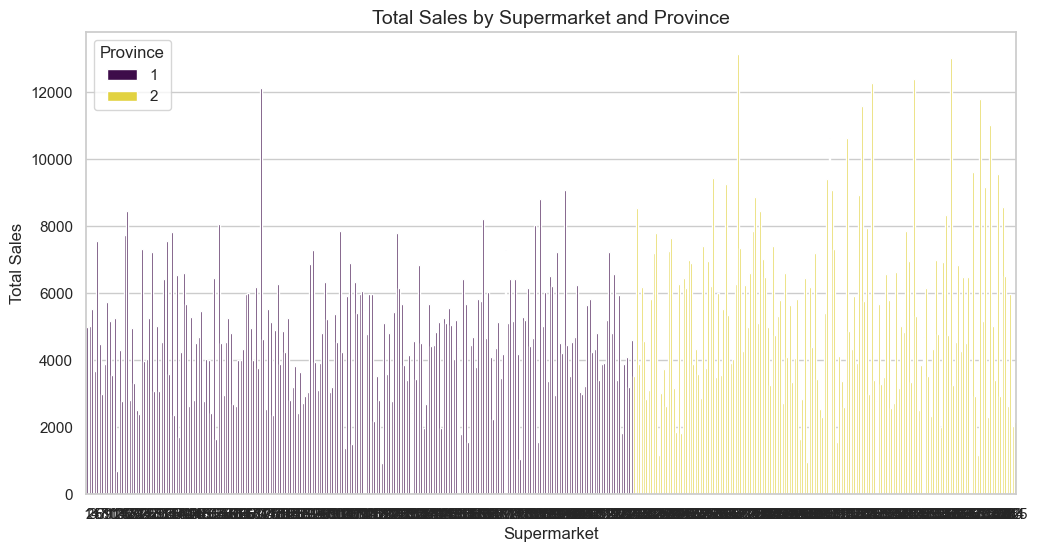

In [60]:
#Visualizing the result

# Set plot style
sns.set_theme(style="whitegrid")

# using Bar Plot: Total Sales by Branch and Province
plt.figure(figsize=(12, 6))
sns.barplot(data=branch_sales, x="supermarket", y="Total_Sales", hue="province", palette="viridis")
plt.title("Total Sales by Supermarket and Province", fontsize=14)
plt.xlabel("Supermarket")
plt.ylabel("Total Sales")
plt.legend(title="Province")
plt.show()

## **Business analysis 2:** 
This next section analyzes **promotion effectiveness** by evaluating the impact of features and displays on promotions at the provincial level.

 **What the Code Does:**
1. **Binary Conversion**: Converts `feature` and `display` columns to `1` if present and `0` otherwise.
2. **Grouping**: Groups data by `feature` and `province` to aggregate metrics.
3. **Calculates Metrics**:
   - **`Display_Count`**: Total displays in each group.
   - **`Week_Count`**: Total weeks with promotions.
   - **`Effectiveness`**: Ratio of displays to weeks (`Display_Count / Week_Count`).

 **Business Insights:**
1. **Consistent Usage**: Provinces `1` and `2` use displays consistently for promotions (`Effectiveness = 1.0`).
2. **Regional Strategies**: Highlights how each province utilizes promotions, guiding improvements where needed.
3. **Resource Allocation**: Insights help distribute marketing budgets and resources effectively.

In [44]:
# Promotion Effectiveness
# Convert 'feature' column to binary: 1 if there's a feature, 0 otherwise
promotion_df['feature'] = promotion_df['feature'].apply(lambda x: 1 if pd.notnull(x) and x != 0 else 0)

# Convert 'display' column to binary: 1 if there's a display, 0 otherwise
promotion_df['display'] = promotion_df['display'].apply(lambda x: 1 if pd.notnull(x) and x != 0 else 0)

promotion_df



# Evaluate which promotions are most effective
def promotion_effectiveness(promotion_df):
    promotion_analysis = promotion_df.groupby(['feature', 'province']).agg(
        Display_Count=('display', 'sum'),
        Week_Count=('week', 'count')
    )
    promotion_analysis['Effectiveness'] = promotion_analysis['Display_Count'] / promotion_analysis['Week_Count']
    print("Promotion Effectiveness:\n", promotion_analysis)
    return promotion_analysis

promotion_analysis = promotion_effectiveness(promotion_df)

Promotion Effectiveness:
                   Display_Count  Week_Count  Effectiveness
feature province                                          
1       1                207193      207193            1.0
        2                144179      144179            1.0


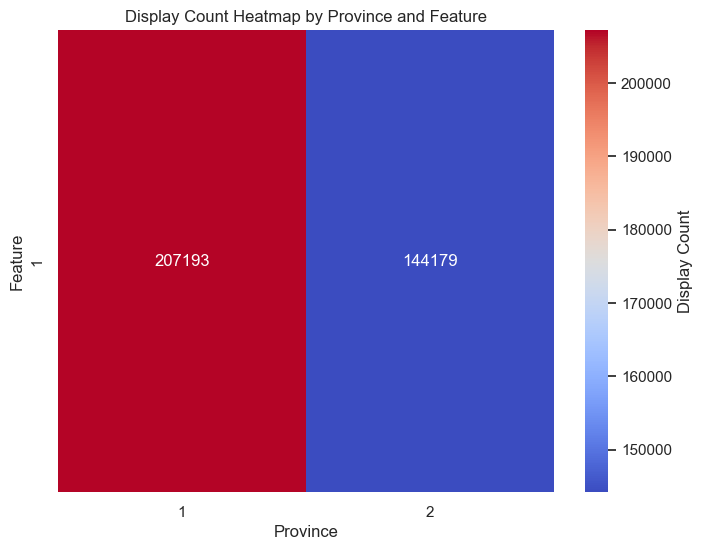

In [62]:
#Visualizing the result

# Reset the index for easy plotting
promotion_analysis = promotion_analysis.reset_index()

# Heatmap: Visualizing Display Count Across Features and Provinces
plt.figure(figsize=(8, 6))

# Use pivot with keyword arguments
heatmap_data = promotion_analysis.pivot(index='feature', columns='province', values='Display_Count')

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    cbar_kws={'label': 'Display Count'}
)
plt.title('Display Count Heatmap by Province and Feature')
plt.xlabel('Province')
plt.ylabel('Feature')
plt.show()



### **Actionable insights**

From the given promotion effectiveness data, the following insights can be derived:

1. **Consistent Display Utilization**:
   - For **feature = 1**, both provinces (1 and 2) used displays consistently every week (`Effectiveness = 1.0`).
   - This suggests that displays were well-coordinated with promotional efforts and fully utilized during the measured period.

2. **High Display Count**:
   - **Province 1** had a total of **207,193 displays**, while **Province 2** had **144,179 displays** for promotions with features.
   - Province 1 used significantly more displays, indicating either a larger market size or higher promotional activity compared to Province 2.

3. **Potential Resource Allocation Differences**:
   - The difference in the display count suggests that Province 1 might have greater marketing resources or higher demand for promotional campaigns than Province 2.
   - It could also point to differences in customer behavior or regional marketing strategies.

